# 作业1 数据预处理

下载数据 homeworks/data/kc_house_data.csv，完成下列任务：

   1. 读取数据，并显示数据信息。
   2. 将 'price' 数据去掉 '$'符号后转换为数值。
   3. 从原始数据中提取 ['price','bedrooms','bathrooms','sqft_living','yr_built']五列数据构成新的数据集，并获取统计数据，以发现新数据中的异常值和潜在的非标准数据。
   4. 在新的数据集上筛选数据，要求保留 0 < bedrooms < 33 并且 0 < bathrooms < 7的数据。
   5. 绘制数据列'yr_built'的直方图。
   6. 绘制 'bedrooms' 和 'price'的关系图。
   7. 绘制 'bathrooms' 和 'price'的关系图。
   8. 绘制 'sqft_living' 和 'price'的关系图。
   9. 绘制数据集的散点图矩阵scatter matrix，定性判断多个变量之间是否存在线性相关。
   10. 定量计算多个变量之间的pearson系数，并绘制heatmap。

In [1]:
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns


In [2]:
# read in the dataset and get columns name 
dataset = pd.read_csv('kc_house_data.csv')
dataset = dataset.sample(frac=0.1, random_state=123)
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5506,4046400440,20140806T000000,$532500,4,2.50,2490,8750,2.0,0,0,...,8,2040,450,1976,0,98008,47.5931,-122.116,2120,10240
9279,4443800385,20140818T000000,$410000,2,1.00,1480,4080,1.0,0,0,...,7,1050,430,1949,0,98117,47.6842,-122.393,1310,4080
16034,8651611640,20150424T000000,$782500,3,2.50,3750,7821,2.0,0,0,...,9,3750,0,2001,0,98074,47.6325,-122.064,3210,8405
6608,2944000050,20150422T000000,$995000,4,3.25,3530,20012,2.0,0,0,...,11,3530,0,1986,0,98052,47.7193,-122.127,3850,20707
20359,7299600920,20141209T000000,$279000,4,2.50,2009,4800,2.0,0,0,...,8,2009,0,2012,0,98092,47.2586,-122.200,1798,4800


In [4]:
# remove character '$'
dataset['price'] = dataset['price'].astype(str).str.replace('$', "")
# Convert column to a numeric data type
dataset['price'] = pd.to_numeric(dataset['price'])

C:\Users\mjye\AppData\Local\Temp\ipykernel_6948\1200649244.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['price'] = dataset['price'].astype(str).str.replace('$', "")


In [5]:
dataset.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5506,4046400440,20140806T000000,532500,4,2.50,2490,8750,2.0,0,0,...,8,2040,450,1976,0,98008,47.5931,-122.116,2120,10240
9279,4443800385,20140818T000000,410000,2,1.00,1480,4080,1.0,0,0,...,7,1050,430,1949,0,98117,47.6842,-122.393,1310,4080
16034,8651611640,20150424T000000,782500,3,2.50,3750,7821,2.0,0,0,...,9,3750,0,2001,0,98074,47.6325,-122.064,3210,8405
6608,2944000050,20150422T000000,995000,4,3.25,3530,20012,2.0,0,0,...,11,3530,0,1986,0,98052,47.7193,-122.127,3850,20707
20359,7299600920,20141209T000000,279000,4,2.50,2009,4800,2.0,0,0,...,8,2009,0,2012,0,98092,47.2586,-122.200,1798,4800


In [6]:
new_dataset = dataset[['price','bedrooms','bathrooms','sqft_living','yr_built']]
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 5506 to 974
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        2161 non-null   int64  
 1   bedrooms     2161 non-null   int64  
 2   bathrooms    2161 non-null   float64
 3   sqft_living  2161 non-null   int64  
 4   yr_built     2161 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 101.3 KB


In [7]:
new_dataset.head()

,price,bedrooms,bathrooms,sqft_living,yr_built
5506,532500,4,2.50,2490,1976
9279,410000,2,1.00,1480,1949
16034,782500,3,2.50,3750,2001
6608,995000,4,3.25,3530,1986
20359,279000,4,2.50,2009,2012


In [8]:
new_dataset.describe()

,price,bedrooms,bathrooms,sqft_living,yr_built
count,2.161000e+03,2161.000000,2161.000000,2161.000000,2161.000000
mean,5.470209e+05,3.383619,2.123438,2100.130495,1971.162888
std,3.885282e+05,0.941576,0.791706,956.621103,29.088249
min,8.400000e+04,0.000000,0.000000,470.000000,1900.000000
25%,3.230000e+05,3.000000,1.750000,1420.000000,1952.000000
50%,4.550000e+05,3.000000,2.250000,1920.000000,1974.000000
75%,6.500000e+05,4.000000,2.500000,2560.000000,1997.000000
max,6.885000e+06,10.000000,7.750000,9890.000000,2015.000000


In [9]:
# cleaning data by dropping rows for what the number of 'bedrooms' is equal to zero, considered as bad data
new_dataset = new_dataset[new_dataset.bedrooms != 0]
# cleaning data by dropping the row for what number of 'bedrooms' is below to '33', considered as potential oulier
new_dataset = new_dataset[new_dataset.bedrooms < 33]
# cleaning data by dropping rows for what the number of 'bathrooms' is equal to zero, considered as bad data
new_dataset = new_dataset[new_dataset.bathrooms != 0]
# cleaning data by dropping the row for what number of 'bathrooms' is below to '7', considered as potential oulier
new_dataset = new_dataset[new_dataset.bathrooms < 7]
# obtain a new summary of the data frame
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 5506 to 974
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        2159 non-null   int64  
 1   bedrooms     2159 non-null   int64  
 2   bathrooms    2159 non-null   float64
 3   sqft_living  2159 non-null   int64  
 4   yr_built     2159 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 101.2 KB


<AxesSubplot:>

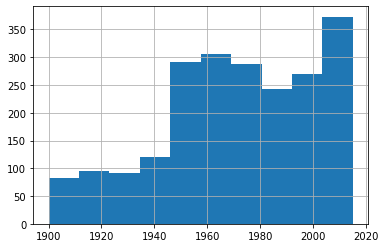

In [10]:
# draw a histogram plot based on' year built' of the new data frame
new_dataset.yr_built.hist()


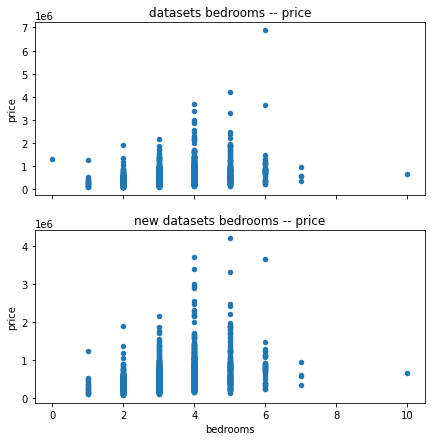

In [11]:
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)  
dataset.plot(kind='scatter', x='bedrooms', y='price', ax=axes[0])
new_dataset.plot(kind='scatter', x='bedrooms', y='price', ax=axes[1])
axes[0].set_title('datasets bedrooms -- price')
axes[1].set_title('new datasets bedrooms -- price')
plt.show()

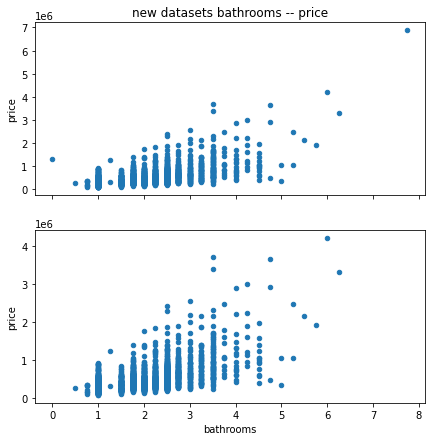

In [12]:
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)  
dataset.plot(kind='scatter', x='bathrooms', y='price', ax=axes[0])
new_dataset.plot(kind='scatter', x='bathrooms', y='price', ax=axes[1])
axes[0].set_title('datasets bathrooms -- price')
axes[0].set_title('new datasets bathrooms -- price')
plt.show()

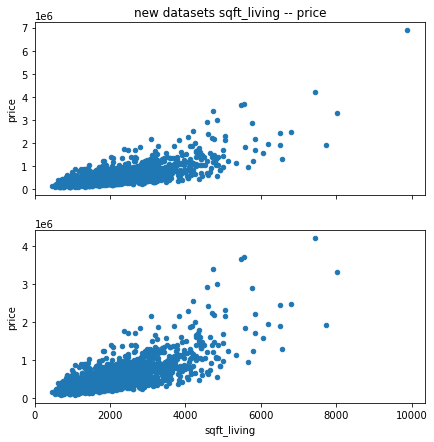

In [13]:
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)  
dataset.plot(kind='scatter', x='sqft_living', y='price', ax=axes[0])
new_dataset.plot(kind='scatter', x='sqft_living', y='price', ax=axes[1])
axes[0].set_title('datasets sqft_living -- price')
axes[0].set_title('new datasets sqft_living -- price')
plt.show()

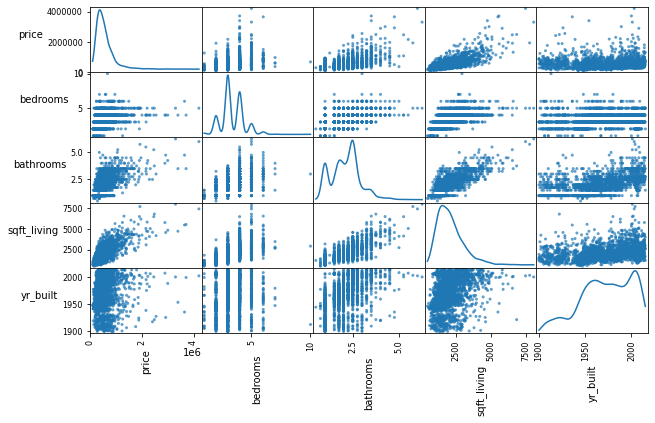

In [14]:
axes = pd.plotting.scatter_matrix(new_dataset, alpha=0.7, figsize=(10,6), diagonal='kde')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

In [15]:
corr = new_dataset.corr(method='pearson')  #计算产生相关系数矩阵
display(corr)

,price,bedrooms,bathrooms,sqft_living,yr_built
price,1.000000,0.336868,0.550671,0.720783,0.065271
bedrooms,0.336868,1.000000,0.528343,0.604909,0.150938
bathrooms,0.550671,0.528343,1.000000,0.762938,0.516512
sqft_living,0.720783,0.604909,0.762938,1.000000,0.321146
yr_built,0.065271,0.150938,0.516512,0.321146,1.000000


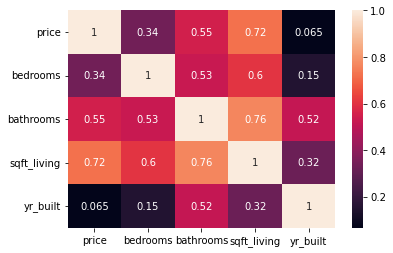

In [16]:
sns.heatmap(corr,  annot=True)
plt.show()